In [1]:
# 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

# 데이터 로드
kg = pd.read_csv("df_geum1.csv")

# 필요없는 열 제거
kg2 = kg.iloc[:,4:]

# 입력변수와 출력 변수 분리
X = kg2.drop(columns=['경계발령',"유해남조류 세포수 (cells/㎖)"])
y = kg2[["경계발령"]]

# 데이터를 훈련용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설계
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                    epochs=1000, batch_size=64, callbacks=[early_stopping])


Epoch 1/1000
13/13 [==============================] - 1s 28ms/step - loss: 0.6496 - accuracy: 0.7651 - val_loss: 0.5649 - val_accuracy: 0.9803
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4903 - accuracy: 0.9790 - val_loss: 0.3821 - val_accuracy: 0.9803
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2990 - accuracy: 0.9790 - val_loss: 0.2012 - val_accuracy: 0.9803
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9790 - val_loss: 0.1125 - val_accuracy: 0.9803
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9790 - val_loss: 0.0974 - val_accuracy: 0.9803
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1042 - accuracy: 0.9790 - val_loss: 0.0956 - val_accuracy: 0.9803
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1023 - accuracy: 0.9790 - val_loss: 0.0933 - val_accuracy: 0.9803
Epoch

13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9827 - val_loss: 0.0514 - val_accuracy: 0.9803
Epoch 59/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9852 - val_loss: 0.0524 - val_accuracy: 0.9803
Epoch 60/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9827 - val_loss: 0.0513 - val_accuracy: 0.9803
Epoch 61/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0527 - val_accuracy: 0.9803
Epoch 62/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9839 - val_loss: 0.0507 - val_accuracy: 0.9901
Epoch 63/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9827 - val_loss: 0.0511 - val_accuracy: 0.9803
Epoch 64/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0421 - accuracy: 0.9839 - val_loss: 0.0524 - val_accuracy: 0.9803
Epoch 65/1000

In [2]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)
print('Test loss: ', loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9901
Test accuracy: 0.9901477694511414
Test loss:  0.05068041384220123


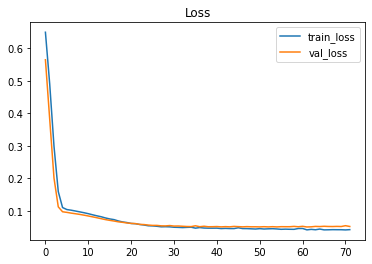

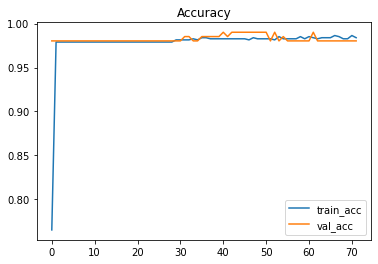

In [3]:
import matplotlib.pyplot as plt

# history 객체에서 손실값과 정확도를 추출합니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 손실값 그래프
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

# 정확도 그래프
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()
